In [1]:
import requests
import warnings
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Suppress SSL warnings
warnings.filterwarnings("ignore", category=requests.packages.urllib3.exceptions.InsecureRequestWarning)

# API Endpoints
CURRENT_QUIZ_URLS = [
    "https://jsonkeeper.com/b/LLQT",
    "https://api.jsonserve.com/rJvd7g"
]
HISTORICAL_QUIZ_URL = "https://api.jsonserve.com/XgAgFJ"

In [3]:
def fetch_data(url):
    try:
        response = requests.get(url, verify=False)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None

In [4]:
current_quiz_data = [fetch_data(url) for url in CURRENT_QUIZ_URLS]

In [5]:
historical_quiz_data = fetch_data(HISTORICAL_QUIZ_URL)

In [6]:
print("Current Quiz Data:", current_quiz_data)
print("Historical Quiz Data:", historical_quiz_data)

Current Quiz Data: [{'quiz': {'id': 43, 'name': None, 'title': 'Structural Organisation in Animals and Plants (7)', 'description': '', 'difficulty_level': None, 'topic': 'Structural Organisation in Animals', 'time': '2024-07-03T00:00:00.000+05:30', 'is_published': True, 'created_at': '2024-07-03T11:00:08.958+05:30', 'updated_at': '2024-09-23T18:43:27.751+05:30', 'duration': 128, 'end_time': '2024-07-04T00:00:00.000+05:30', 'negative_marks': '1.0', 'correct_answer_marks': '4.0', 'shuffle': True, 'show_answers': True, 'lock_solutions': False, 'is_form': False, 'show_mastery_option': False, 'quiz_type': None, 'is_custom': False, 'banner_id': None, 'exam_id': None, 'show_unanswered': False, 'ends_at': '2025-01-18', 'lives': None, 'live_count': 'Free Test', 'coin_count': -1, 'questions_count': 128, 'daily_date': 'January 17, 2025', 'max_mistake_count': 15, 'questions': [{'id': 1827, 'description': 'The tissue which has free surface that faces either a body fluid or the outside environment i

In [13]:
historical_df = pd.DataFrame(historical_quiz_data)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     14 non-null     int64 
 1   quiz_id                14 non-null     int64 
 2   user_id                14 non-null     object
 3   submitted_at           14 non-null     object
 4   created_at             14 non-null     object
 5   updated_at             14 non-null     object
 6   score                  14 non-null     int64 
 7   trophy_level           14 non-null     int64 
 8   accuracy               14 non-null     object
 9   speed                  14 non-null     object
 10  final_score            14 non-null     object
 11  negative_score         14 non-null     object
 12  correct_answers        14 non-null     int64 
 13  incorrect_answers      14 non-null     int64 
 14  source                 14 non-null     object
 15  type                   14

In [16]:
print(historical_df.head())

       id  quiz_id                       user_id  \
0  336497       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
1  336448        6  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
2  333330       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
3  333242        6  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
4  329504       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   

                    submitted_at                     created_at  \
0  2025-01-17T15:30:18.027+05:30  2025-01-17T15:30:18.044+05:30   
1  2025-01-17T15:17:44.042+05:30  2025-01-17T15:17:44.056+05:30   
2  2025-01-16T20:13:19.682+05:30  2025-01-16T20:13:19.699+05:30   
3  2025-01-16T20:00:11.562+05:30  2025-01-16T20:00:11.573+05:30   
4  2025-01-15T20:34:39.462+05:30  2025-01-15T20:34:39.478+05:30   

                      updated_at  score  trophy_level accuracy speed  ...  \
0  2025-01-17T15:30:18.044+05:30    108             2     90 %   100  ...   
1  2025-01-17T15:17:44.056+05:30     92             1    100 %   100  ...   
2  2025-01-16T20:13:19.699+05:30    116             2

In [17]:
def extract_quiz_performance(data):
    performance_records = []
    for quiz in data:
        user_id = quiz.get("user_id", "Unknown")
        performance_records.append({
            "user_id": user_id,
            "score": quiz.get("score", 0),
            "accuracy": float(quiz.get("accuracy", "0 %").replace("%", "")) / 100,
            "correct_answers": quiz.get("correct_answers", 0),
            "incorrect_answers": quiz.get("incorrect_answers", 0),
            "negative_score": quiz.get("negative_score", 0),
            "speed": float(quiz.get("speed", 0))
        })
    return pd.DataFrame(performance_records)

In [18]:
historical_df = extract_quiz_performance(historical_quiz_data)

In [19]:
def analyze_performance(df):
    score_trend = df["score"].mean()
    accuracy_trend = df["accuracy"].mean()
    mistakes_trend = df["incorrect_answers"].mean()
    return score_trend, accuracy_trend, mistakes_trend

score_trend, accuracy_trend, mistakes_trend = analyze_performance(historical_df)

In [24]:
def generate_recommendations(score, accuracy, mistakes):
    recommendations = []
    if accuracy < 0.7:
        recommendations.append("Work on accuracy. Consider revising weak areas.")
    if mistakes > 5:
        recommendations.append("Reduce mistakes by reviewing incorrect answers carefully.")
    if score < 50:
        recommendations.append("Improve your overall score by focusing on high-weightage topics.")
    return recommendations

recommendations = generate_recommendations(score_trend, accuracy_trend, mistakes_trend)

In [25]:
user_input = input("Do you want to enter custom performance values? (yes/no): ").strip().lower()
if user_input == "yes":
    score_trend = float(input("Enter your average score: "))
    accuracy_trend = float(input("Enter your accuracy (0-1, e.g., 0.75 for 75%): "))
    mistakes_trend = int(input("Enter your average number of mistakes: "))

recommendations = generate_recommendations(score_trend, accuracy_trend, mistakes_trend)

print("\nPersonalized Recommendations:")
for rec in recommendations:
    print("- " + rec)


Do you want to enter custom performance values? (yes/no): yes
Enter your average score: 44
Enter your accuracy (0-1, e.g., 0.75 for 75%): 2
Enter your average number of mistakes: 3

Personalized Recommendations:
- Improve your overall score by focusing on high-weightage topics.


In [26]:
unique_students = historical_df["user_id"].nunique()
print(f"Number of unique students: {unique_students}")

Number of unique students: 1


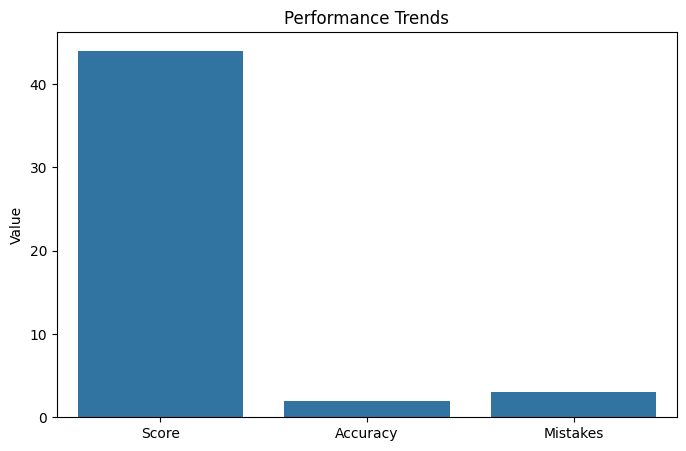

In [27]:
plt.figure(figsize=(8, 5))
sns.barplot(x=["Score", "Accuracy", "Mistakes"], y=[score_trend, accuracy_trend, mistakes_trend])
plt.title("Performance Trends")
plt.ylabel("Value")
plt.show()

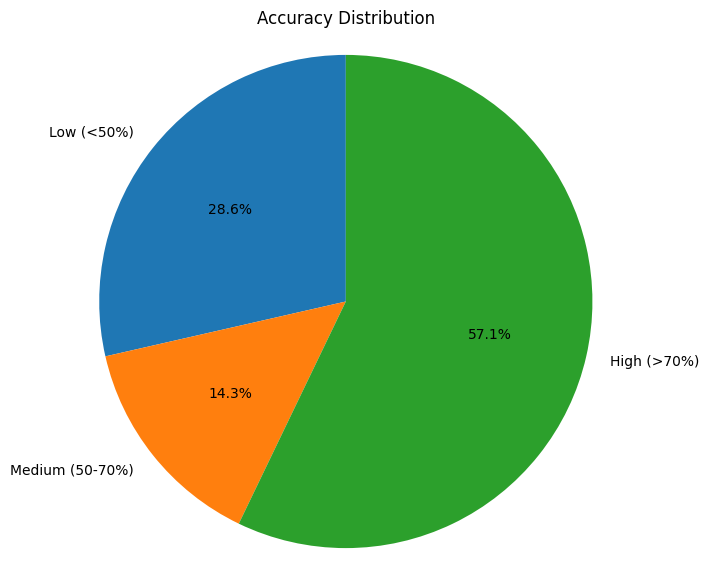

In [28]:
accuracy_bins = ['Low (<50%)', 'Medium (50-70%)', 'High (>70%)']
accuracy_counts = [
    len(historical_df[historical_df['accuracy'] < 0.5]),
    len(historical_df[(historical_df['accuracy'] >= 0.5) & (historical_df['accuracy'] < 0.7)]),
    len(historical_df[historical_df['accuracy'] >= 0.7])
]
plt.figure(figsize=(7, 7))
plt.pie(accuracy_counts, labels=accuracy_bins, autopct='%1.1f%%', startangle=90)
plt.title("Accuracy Distribution")
plt.axis('equal')
plt.show()

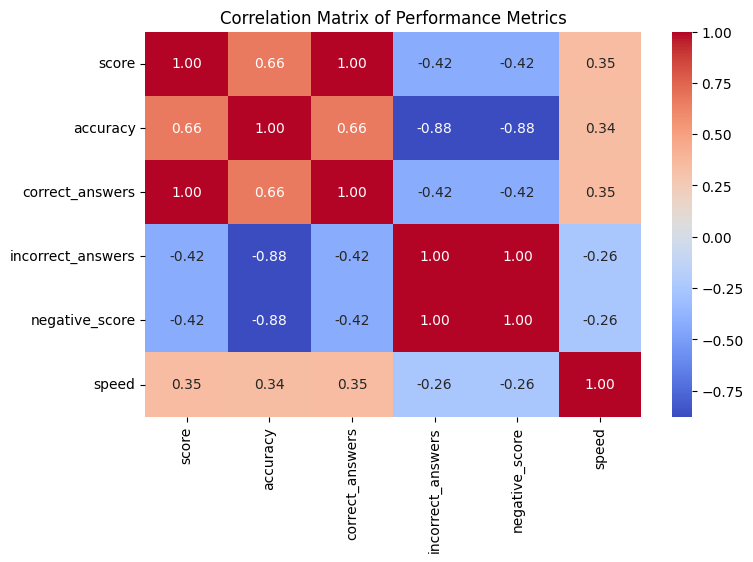

In [29]:
correlation_matrix = historical_df[['score', 'accuracy', 'correct_answers', 'incorrect_answers', 'negative_score', 'speed']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Performance Metrics")
plt.show()

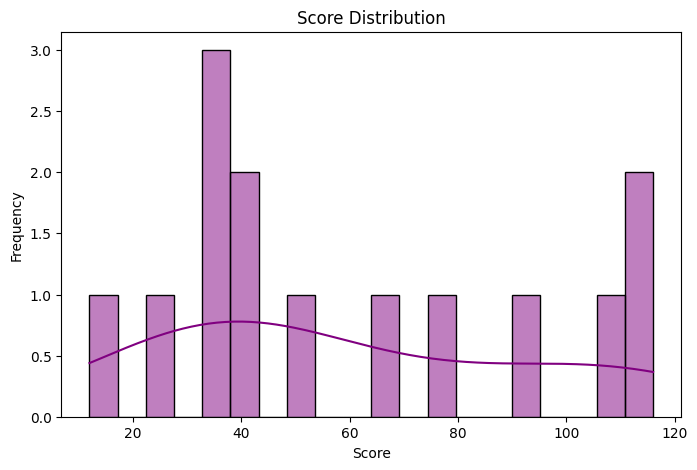

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(historical_df['score'], kde=True, color='purple', bins=20)
plt.title("Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

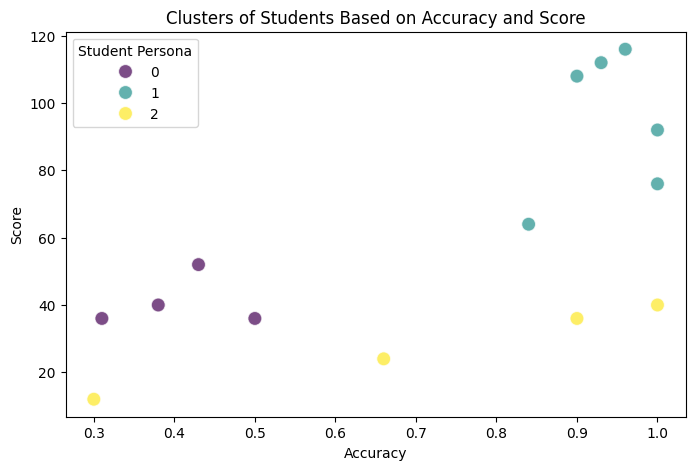

                                             Persona  accuracy            \
                                                          mean       std   
0  The Balanced Performer - Good Accuracy and Spe...  0.715000  0.311288   
1  The Careful Thinker - Accuracy is Strong, but ...  0.938333  0.062102   
2  The Fast Learner - Quick to Answer, but Needs ...  0.405000  0.080208   

       speed                score            incorrect_answers            
        mean       std       mean        std              mean       std  
0  97.500000  5.000000  28.000000  12.649111              2.75  3.095696  
1  96.833333  5.671567  94.666667  21.115555              1.50  1.378405  
2  90.000000  9.933110  41.000000   7.571878             15.50  4.654747  


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['accuracy', 'speed', 'score', 'incorrect_answers']

scaler = StandardScaler()
student_data = historical_df[features]

student_data_scaled = scaler.fit_transform(student_data)

kmeans = KMeans(n_clusters=3, random_state=42)
historical_df['Cluster'] = kmeans.fit_predict(student_data_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x='accuracy', y='score', hue='Cluster', data=historical_df, palette='viridis', s=100, alpha=0.7)
plt.title("Clusters of Students Based on Accuracy and Score")
plt.xlabel("Accuracy")
plt.ylabel("Score")
plt.legend(title="Student Persona")
plt.show()

personas = {
    0: "The Fast Learner - Quick to Answer, but Needs Focus on Accuracy",
    1: "The Careful Thinker - Accuracy is Strong, but Needs to Improve Speed",
    2: "The Balanced Performer - Good Accuracy and Speed, Needs Consistency"
}

historical_df['Persona'] = historical_df['Cluster'].map(personas)

persona_summary = historical_df.groupby('Persona').agg({
    'accuracy': ['mean', 'std'],
    'speed': ['mean', 'std'],
    'score': ['mean', 'std'],
    'incorrect_answers': ['mean', 'std']
}).reset_index()

print(persona_summary)


In [34]:
def generate_creative_labels(persona_summary):
    insights = []
    for idx, row in persona_summary.iterrows():
        persona = row[('Persona', '')]

        accuracy_mean = row[('accuracy', 'mean')]
        speed_mean = row[('speed', 'mean')]
        score_mean = row[('score', 'mean')]
        incorrect_mean = row[('incorrect_answers', 'mean')]
        if persona == "The Fast Learner - Quick to Answer, but Needs Focus on Accuracy":
            if accuracy_mean < 0.6:
                insights.append(f"{persona}: Try focusing more on accuracy. Speed is your strength, but accuracy needs attention!")
            else:
                insights.append(f"{persona}: Excellent at speed! Consider balancing it with targeted practice to maintain accuracy.")

        elif persona == "The Careful Thinker - Accuracy is Strong, but Needs to Improve Speed":
            if speed_mean < 1.0:
                insights.append(f"{persona}: Your accuracy is impressive! Work on increasing your speed to improve efficiency.")
            else:
                insights.append(f"{persona}: Great accuracy! However, focus on improving time management for better speed.")

        elif persona == "The Balanced Performer - Good Accuracy and Speed, Needs Consistency":
            if score_mean > 70:
                insights.append(f"{persona}: Keep up the good work! You’re excelling in both speed and accuracy. Aim for consistent performance.")
            else:
                insights.append(f"{persona}: You have a great balance, but work on reducing mistakes for an overall better score.")

    return insights
creative_labels = generate_creative_labels(persona_summary)

for label in creative_labels:
    print(label)

The Balanced Performer - Good Accuracy and Speed, Needs Consistency: You have a great balance, but work on reducing mistakes for an overall better score.
The Careful Thinker - Accuracy is Strong, but Needs to Improve Speed: Great accuracy! However, focus on improving time management for better speed.
The Fast Learner - Quick to Answer, but Needs Focus on Accuracy: Try focusing more on accuracy. Speed is your strength, but accuracy needs attention!


In [36]:
def predict_neet_rank(user_id):
    user_scores = historical_df[historical_df["user_id"] == user_id]["score"]

    if user_scores.empty:
        return "No data available for this user."

    avg_score = np.mean(user_scores)
    estimated_rank = max(1, int((720 - avg_score) * 5000 / 720))
    return estimated_rank
user_id = "YcDFSO4ZukTJnnFMgRNVwZTE4j42"
print(f"Estimated NEET rank for user {user_id}: {predict_neet_rank(user_id)}")

Estimated NEET rank for user YcDFSO4ZukTJnnFMgRNVwZTE4j42: 4581
